## Coding for Lecture I 

by *Suwichaya Suwanwimolkul, Ph.D.*

The coding exercies and examples are used as parts of  Lecture I: What is an estimator?  in Estimation Theory EE2102523. 

The topics covered in this exercise are: 

- [Sampling from Distribution](#sampling-from-distribution)
- [Estimators](#estimators) 
    - [Sample Mean](#sample-mean-estimator)
    - [Sample Variance](#sample-variance-estimator)
- [Estimator Properties](#estimator-properties)
    - [Bianess](#biasness)
    - [MSE](#mse)
    - [Consistency](#consistency)
- [HW1.2](#hw12)
    - [Biased Estimator](#biased-estimator)
    - [Unbiased Estimator](#unbiased-estimator)
 
 

Notes.
- The examples of biased vs unbiased estimators are inspried by [Sampling \& Estimation EP.3 by Khalel Corona](https://www.youtube.com/watch?v=pNbDigYLqSY).
-  Don't forget to install the dependency `pip install -r requirements.txt`
- `utils.py` contains the supplenmary implementations for each fucntion used in `Lecture1.ipynb` 

## Sampling from Distribution



### Definition
Suppose that the unknown parameter $\theta$ is in real space, i.e., $\theta\in \mathbb{R}$, we estimate the parameter $\theta$ by **randomly sampling** $X_1, X_2, ..., X_N$ from the same distribution as $X$.

During performing random sampling, we assume that 
 
- $X_1, X_2, ..., X_N$ is drawn independently from a distribution $f_x(X)$, e.g., $f_x(X) = Uniform(a,b), \mathcal{Gauss}(\mu, \sigma^2)$.   
- $X_1, X_2, ..., X_N$ is assumed to have the same distribution as $X$.    

### Process

In the following example, we will show what does it look like when we sample $X_1, X_2, ..., X_N$  from $X$ that has a uniform distribution, Uniform($a$,$b$) where $a$ = 0, $b$ =1. 


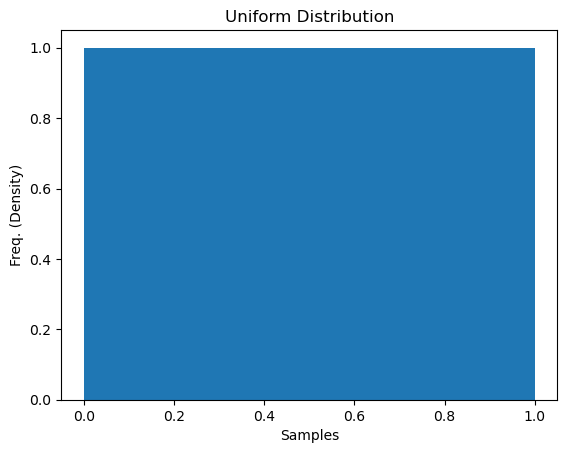

Mean of population: 0.50
Variance of population: 0.08


In [1]:
import numpy as np  
import joypy
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd

import os


cwd = os.getcwd()

data_population = 1*np.linspace(0,1,5000)
plt.hist(data_population, bins = 1000, density=True, label="Distribution of Y")
plt.ylabel("Freq. (Density)")
plt.xlabel("Samples")
plt.title("Uniform Distribution")
plt.show()

print("Mean of population: %.2f" % np.mean(data_population))
print("Variance of population: %.2f" % np.var(data_population))

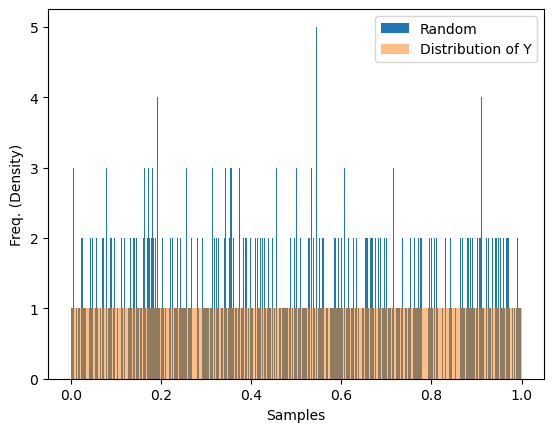

Mean of subsamples: 0.50
Variance of subsamples: 0.08


In [2]:
N_select = 1000
data_sample = np.random.choice(data_population, N_select, replace=False)

plt.hist(data_sample, bins = 1000, density=True, label="Random")
plt.hist(data_population, bins = 1000, alpha=0.5, density=True, label="Distribution of Y")
plt.legend()
plt.ylabel("Freq. (Density)")
plt.xlabel("Samples")
plt.show() 

print("Mean of subsamples: %.2f" % np.mean(data_sample))
print("Variance of subsamples: %.2f" % np.var(data_sample))

## Estimators

In [3]:

from utils import sample_mean_simulation, sample_variance_simulation, hist_plot, bias_func, MSE_func

# See utils.py for the coding of each fucntion
# -----------------------------------------------------------------
# def sample_mean_simulation(data_population, select, size = 1000):  
#       .... 
# ----------------------------------------------------------------- 
# def bias_func(estimates, gt): 
#   np.mean(estimates) - gt
# -----------------------------------------------------------------
# def sample_variance_simulation .....
# ... 
# -----------------------------------------------------------------
# def hist_plot
# .... so on....

### Sample Mean Estimator

Let $X_1$, $X_2$,  ..., $X_n$ be a random sample sharing the same distribution as  $X$, but the parameters (\eg, mean and variance) could be unknown. 
 
**Sample mean** is used as an estimator for the mean value of $X$,  is defined as 
\begin{equation}
    \Theta_{\mu} := \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i 
\end{equation}

### Sample Variance Estimator 

### Definition of Sample Variance Estimator

Let $X_1$, $X_2$,  ..., $X_n$ be a random sample sharing the same distribution as  $X$, but the parameters ,eg, mean and variance, could be unknown. 

***Sample variance estimator*** for variance of $X$ is defined as 
\begin{equation}
    \Theta_{\sigma^2} := S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2 
\end{equation}


## Estimator Properties

- [Biasness](#biasness)
- [MSE](#mse)
- [Consistency](#consistency)

### Biasness

Let $\Theta := f(X_1, X_2, ..., X_N)$ be the point estimator for $\theta$. The bias of the point estimator is defined as 
\begin{equation}  
\text{Bias}_{\theta}{(\Theta)} = E(\Theta) - \theta.
\end{equation}

#### Example:  Biasness of Sample Mean Estimator
In the following example, we compute the bias of the given estimators and show 
- the histogram of estimators, 
- the mean of estimators 
- the true variance.
 

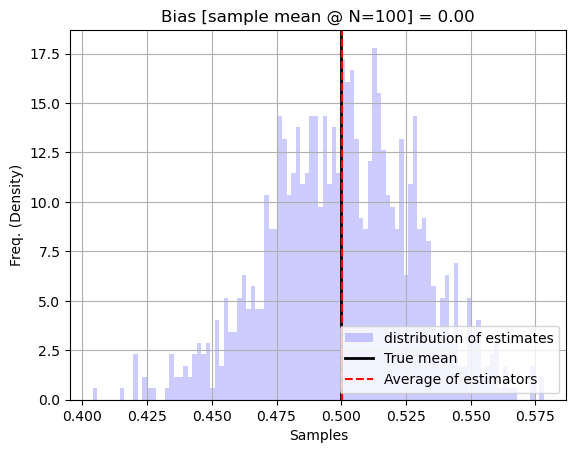

In [4]:
estimator_name_temp =  "sample mean" 

N_select = 100 # the number of samples selected from the entire population

gt = np.mean(data_population) # the true population mean
 
sample_mean_estimates = sample_mean_simulation(data_population, N_select) # simulating the sample mean estimator (the sample mean estimates are the output).


Bias = bias_func(sample_mean_estimates, gt) # compute the bias


# plotting histrogram, mean of the estimators, and the true mean value of the data population 
hist_plot(sample_mean_estimates, data_population, gt, bias_func, estimator_name = "%s @ N=%d" % (estimator_name_temp, N_select), ploting = "Bias", dirpath=cwd)

### MSE



#### Definition:

If  $\Theta$ is an unbiased estimator of $\theta$, ie, $E[\Theta] = \theta$, then the efficiency of the estimator is **inverse proportional** to $\text{Var}{[\Theta]}  = E[(\Theta-\mu_{\Theta})^2]$. **An efficient estimator** can also be characterized by having the lower variances from the true value $\theta$, which can be measured by mean-square error (MSE) ... 

**Mean squared error (MSE) of an estimator $\Theta$**  is defined as: 

\begin{equation}  
MSE_{\theta}(\Theta) = E_{\Theta} [(\Theta - \theta)^2].
\end{equation} 

The smaller MSE is generally indicative of the better estimator. 

#### Example: MSE of Sample Mean Estimators

After applying the above equation to derive the MSE of sample mean $\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i$, 

you will find that the MSE is actually a function of the number of samples ($n$).

So, in the following example, we want you to simulate the emperical MSE at different $n$ to verify if you reach a similar conclusion.  

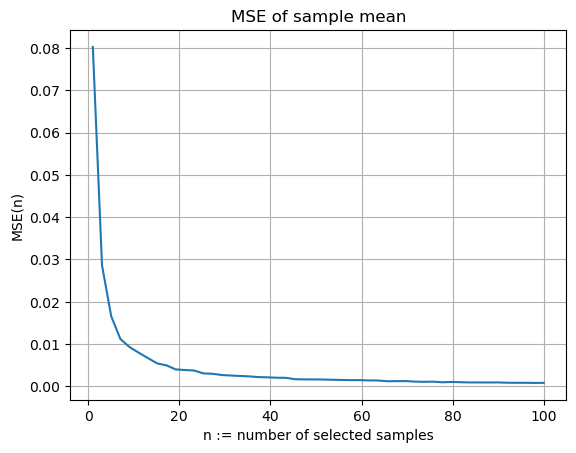

In [5]:
# MSE
N_select_list = np.linspace(1, 100).tolist() # Adjust the ranges of n and see the convergence of MSE
ploting  = "MSE"
MSE_list = []  

gt = np.mean(data_population)

for N_select in N_select_list: 
    sample_mean_estimates = sample_mean_simulation(data_population, int(N_select))    # See utils.py
    var, bias_square = MSE_func(sample_mean_estimates, gt)   # See utils.py
    mse              = var + bias_square
    MSE_list.append(mse)
    
plt.plot(N_select_list, MSE_list)
plt.xlabel("n := number of selected samples")
plt.ylabel("MSE(n)")
plt.title("MSE of %s" % estimator_name_temp)
plt.grid()
plt.savefig(os.path.join(cwd, "%s-%s.pdf" % (ploting, estimator_name_temp)))
plt.savefig(os.path.join(cwd, "%s-%s.png" % (ploting, estimator_name_temp)))
plt.show()


### Consistency



#### Definition:

Let $\Theta_1, \Theta_2, ..., \Theta_n, ...,$ be a sequence of the point estimator $\Theta$; each of which is sorted by the number of the random samples  $n$.  
 
Here, we write an estimator as a function of $n$ random samples explicitly, ie, $\Theta=\Theta_n = f(X_1, X_2, ..., X_n)$.   
 
For any $\epsilon > 0$,  we say that $\Theta$ is a consistent estimator of $\theta$, if 
\begin{equation}
    \lim_{n \rightarrow \infty} P (|\Theta_n - \theta | \geq \epsilon) = 0  \hspace{0.5cm} \text{for all possible value of~} \theta.
\end{equation}

In other words, an estimator $\Theta$ is a consistent estimator for $\theta$, if  
$\Theta$ converges to $\theta$ in probability, or $\Theta \xrightarrow{p} \theta$.



#### Example: Consistency of Sample Mean Estimators

In this example, we look at the density of $\Theta_n - \theta$ to reflect the empirical distribution of $P (\Theta_n - \theta) $.

We want to check the following characteristics:

- Does the empirical distribution of $ \Theta_n - \theta $ is centering at 0  ? 
- Is the shape of the distribution is getting smaller and smaller such that it can be bounded by a small positive value ($\epsilon$) ? 

If the empirical distribution shows these characteristics, it suggests that the estimator converges to $\theta$ in probability (as verified by the shape of the histrogram density). 

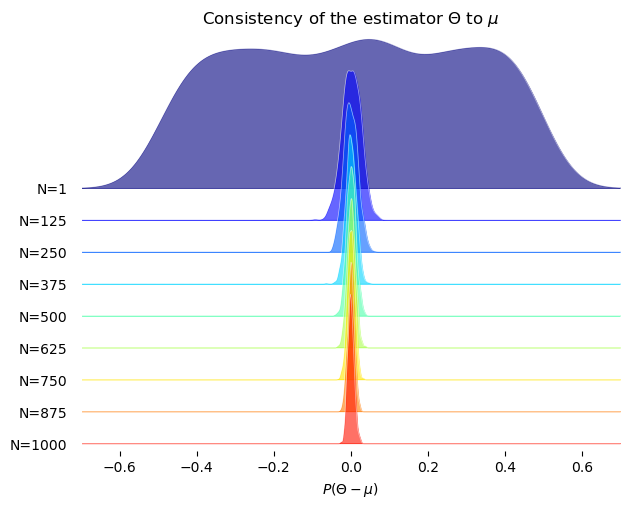

In [6]:
# Consistency 
ploting  = "Consistency"
gt = np.mean(data_population)

epsilon = 0

N_select_list = np.linspace(1, 1000, 9).tolist() # Adjust the ranges of n and see the convergence of Consistency  
Population_list = [] 
 
df = pd.DataFrame()

for N_select in N_select_list:
    sample_mean_estimates = sample_mean_simulation(data_population, int(N_select))  # See utils.py
    estimates_diff        = sample_mean_estimates - gt
    df["N=%d" % int(N_select)]     = estimates_diff

 
joypy.joyplot(df, overlap=2, hist=False, colormap=cm.jet, alpha=0.6, linecolor='w', linewidth=.5, xlabels=True, ylabels=True, ylim='mean')
plt.xlabel("$P(\Theta-\mu)$") 
plt.title("Consistency of the estimator $\Theta$ to $\mu$") 
plt.show()

## HW.1.2 

Let $X_1, X_2, ...$ be a random sample from a distribution with mean $\mu$ and variance $\sigma^2$. Note that an empirical variance denoted as $S^2_{\mu}$ is given by the following equation and is not the same as the sample variance $S^2$.

\begin{equation}  
   S^2_{\mu} = \frac{1}{n}  \sum_i \left( X_i - \bar{X} \right)^2  
\end{equation}

 
- Q1. Is the empirical variance $S^2_{\mu}$,  an unbiased estimator for variance $\sigma^2$?    ***Hint!*** Check if  $E[S^2_{\mu}]  - \sigma^2 = 0$?

- Q2. Is sample variance $S^2$ an unbiased estimator for variance $\sigma^2$?   

- Q3. At $n = 10, 100, 1000, 10000$ (`N_select`:= $n$), and simulate the bias of both estimators  $S^2_{\mu}$ and $S^2$. 
    -  Write the description for each simulation at different $n$ values. 
    - Provide **two sets of  plots** for the estimators $S^2$ and $S^2_{\mu}$, ie, the histogram of estimators, the mean of estimators, and the true variance (provided by `hist_plot`).  
 

### Unbiased Estimator

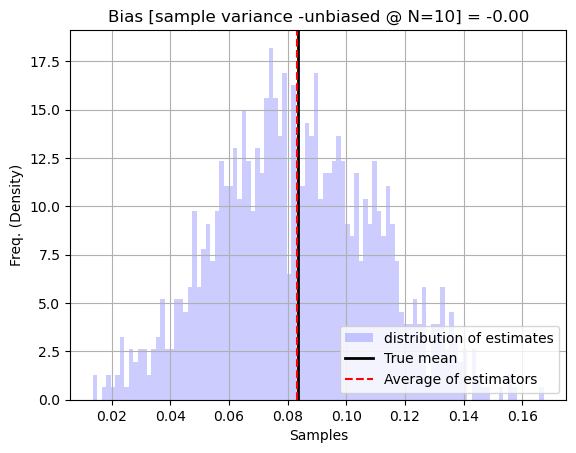

In [7]:
N_select = 10
sample_variance_estimates = sample_variance_simulation(data_population, N_select, unbiased = True)  # See utils.py
gt = np.var(data_population)
hist_plot(sample_variance_estimates, data_population, gt, bias_func, estimator_name = "sample variance -unbiased @ N=%d" % N_select, ploting = "Bias", dirpath=cwd)
 

### Biased Estimator

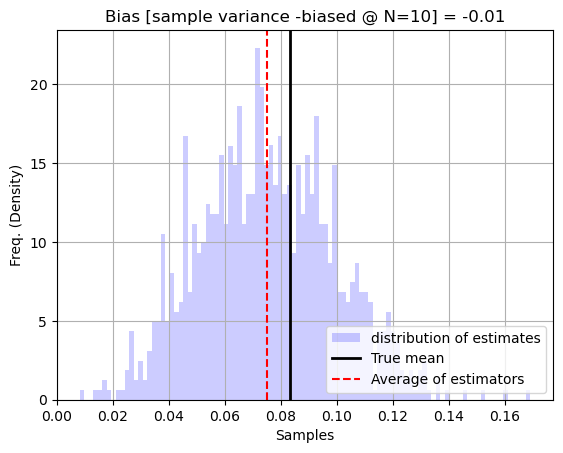

In [8]:
N_select = 10
sample_variance_estimates = sample_variance_simulation(data_population, N_select, unbiased = False) # See utils.py
gt = np.var(data_population)
hist_plot(sample_variance_estimates, data_population, gt, bias_func, estimator_name = "sample variance -biased @ N=%d" % N_select, ploting = "Bias", dirpath=cwd)
 